# view the data gathered

In [166]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
datapath="C:/Users/dexte/Documents/GitHub/3D-textures/"

def get_friction(trial1_forces,trial2_forces,trial3_forces,mass):
    mass=mass/1000 #convert to kg
    gf_to_N = lambda arr: [f * 0.00981 for f in arr]
    all_forces = np.concatenate([gf_to_N(trial1_forces[10:-5]),gf_to_N(trial2_forces[10:-5]),gf_to_N(trial3_forces[10:-5])]).reshape((3,len(gf_to_N(trial1_forces[10:-5]))))
    avg_force = np.mean(all_forces,axis=0)
    error = np.std(avg_force)
    avg_force = np.mean(avg_force)
    # Compute normal force (assuming gravity = 9.81 m/s²)
    normal_force = mass * 9.81

    # Return coefficient of friction
    mu = avg_force / normal_force
    return mu, error

## load in

In [167]:
def get_info(file):
    name=file.split("/")[-1]
    meta=name.split("_")
    texture=meta[1]
    mass=float(meta[2].replace(".csv",""))
    df=pd.read_csv(file)
    friction,error=get_friction(df['Trial 1 Force'],df['Trial 2 Force'],df['Trial 3 Force'],mass)
    return df, friction,texture,error



In [168]:
directory=datapath+"Friction/data/"
files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

d={"Textures":[],"Frictions":[],"Error":[]}

for file in files:
    df,friction,texture,error=get_info(directory+file)
    d["Textures"].append(texture)
    d["Frictions"].append(friction)
    d['Error'].append(error)

d=pd.DataFrame(d)
print(d)

     Textures  Frictions     Error
0      bubble   0.246525  0.053720
1      carpet   0.242462  0.095949
2        cork   0.344905  0.011200
3      cotton   0.129354  0.090634
4       Efoam   0.282917  0.031389
5        felt   0.101553  0.016656
6       Ffoam   0.396798  0.072894
7        flat   0.343766  0.203571
8       Gfoam   0.191812  0.020399
9   lacedMatt   0.124083  0.026481
10    leather   0.255904  0.019213
11    plastic   0.101801  0.020793
12     rubber   1.499724  0.043591
13       wool   0.171821  0.006390


## visualise

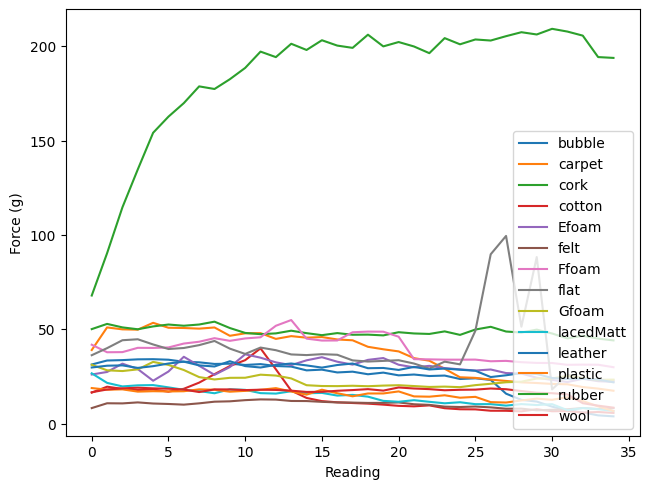

In [169]:
for file in files:
    df,friction,texture,_=get_info(directory+file)
    average=np.average(df[['Trial 1 Force','Trial 2 Force','Trial 3 Force']],axis=1)
    plt.plot(average,label=texture)
plt.legend(loc="lower right")
plt.tight_layout()
plt.xlabel("Reading")
plt.ylabel("Force (g)")
plt.show()

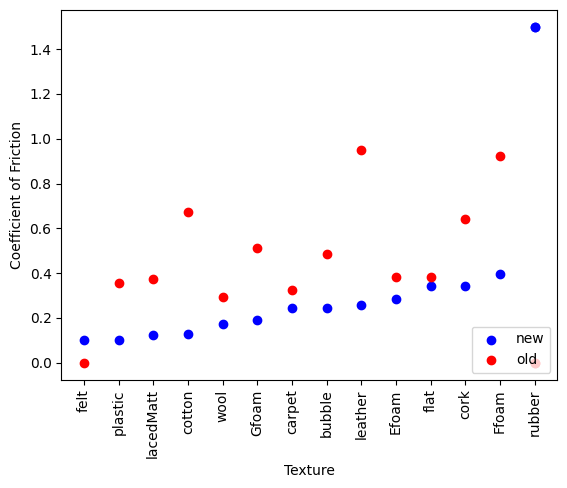

In [170]:
old=pd.read_csv("C:/Users/dexte/Documents/GitHub/3D-textures/Friction/olddata/data.csv")

current=d.sort_values(by="Frictions")
name_list = current['Textures'].tolist()

for i in range(len(current['Frictions'])):
    value = current[current['Textures'] == name_list[i]]['Frictions'].values[0]
    old_fric=old[old['texture'] == name_list[i]]['friction'].values[0]
    plt.scatter(i,value,c="b")
    plt.scatter(i,old_fric,c="r")

plt.scatter(i,value,c="b",label="new")
plt.scatter(i,old_fric,c="r",label="old")
plt.xticks([i for i in range(len(current['Frictions']))],name_list,rotation="vertical")
plt.xlabel("Texture")
plt.legend(loc="lower right")
plt.ylabel("Coefficient of Friction")
plt.show()
